# Web Intelligence
## Dimensionality Reduction

#### Prof. Claudio Lucchese


## PCA: Principal Component Analysis

### Dimensionality reduction by using the direction of maximum variance



PCA finds the orthogonal directions of maximum variance of the given data. It can be thought as a transformation a new coordinate system, where the first coordinate (the first principal component) identifies the projection of greatest variance, the second coordinate the second greatest variance, etc. etc.

Mathematically, the principal components are the eigenvectors of the covariance matrix.

## Data Preprocessing

Before running PCA, it is required to standardize the features of our data.
This normalizes the scale of the different features.

Recall, here we have #istances x # features

 - Step 1. Zero out the mean of the data

 - Step 2. Rescale each coordinate to have unit variance

In [1]:
from sklearn.datasets import make_classification

# Draw some random data in a 2-dimensional space
n_samples = 100
X, Y = make_classification(n_samples=n_samples, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_classes=1, n_clusters_per_class=1,
                           random_state=5)

In [2]:
# manual standardization
X = X - X.mean(axis=0)
X = X / X.std(axis=0)
# try using the StandardScaler as an exercise

In [3]:
# check
X.mean(axis=0)

array([6.88338275e-17, 1.47659662e-16])

In [4]:
# check
X.std(axis=0)

array([1., 1.])

In [5]:
# With StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Draw some random data in a 2-dimensional space
n_samples = 100
X, Y = make_classification(n_samples=n_samples, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_classes=1, n_clusters_per_class=1,
                           random_state=5)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# check
print(X.mean(axis=0))

# check
print(X.std(axis=0))

[6.88338275e-17 1.47659662e-16]
[1. 1.]


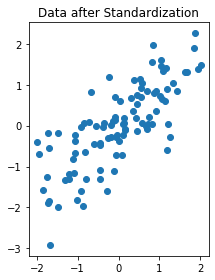

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True) 

ax.plot( X[:,0], X[:,1], 'o' )
ax.set_title("Data after Standardization")
ax.set_aspect('equal')

In [7]:
from sklearn.decomposition import PCA

pca = PCA() # this will create as many components 
            # as the number of features
pca.fit(X)  # note this matrix is [samples x dimentions]
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

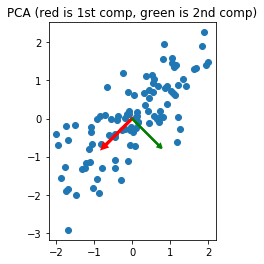

In [8]:
fig, ax = plt.subplots()

ax.plot( X[:,0], X[:,1], 'o' )

#   from x,y  ---to-------->     x,y
ax.arrow(0,0, pca.components_[0,0], pca.components_[0,1], 
          head_width=0.1, head_length=0.1, fc='r', ec='r', lw=3, zorder=2)

ax.arrow(0,0, pca.components_[1,0], pca.components_[1,1], 
          head_width=0.1, head_length=0.1, fc='g', ec='g', lw=2, zorder=2)

ax.set_title("PCA (red is 1st comp, green is 2nd comp)")
ax.set_aspect('equal')

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
pca.components_

array([[-0.70710678, -0.70710678]])

In [10]:
# project data onto the selected components
X_proj = pca.transform(X)

print ( X_proj.shape )
print ( X_proj[:10] )

(100, 1)
[[ 1.68832282]
 [-1.05658337]
 [-0.44943098]
 [ 2.01697441]
 [ 1.36662475]
 [ 0.24783144]
 [-1.72274358]
 [-1.17130471]
 [-0.40592384]
 [ 1.35316568]]


At this point `X_proj` contains the coordinates of the points along the first principal component.

We can get the 2-D coordinates of those points placed along the first principal component direction as follows.

In [12]:
# move data back to the original space
X_approx = pca.inverse_transform(X_proj)
X_approx.shape

(100, 2)

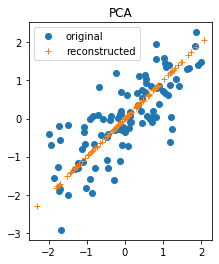

In [13]:
fig, ax = plt.subplots()

ax.plot( X[:,0], X[:,1], 'o', label="original" )

ax.plot( X_approx[:,0], X_approx[:,1], '+', label="reconstructed" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend()

### PCA versus Regression

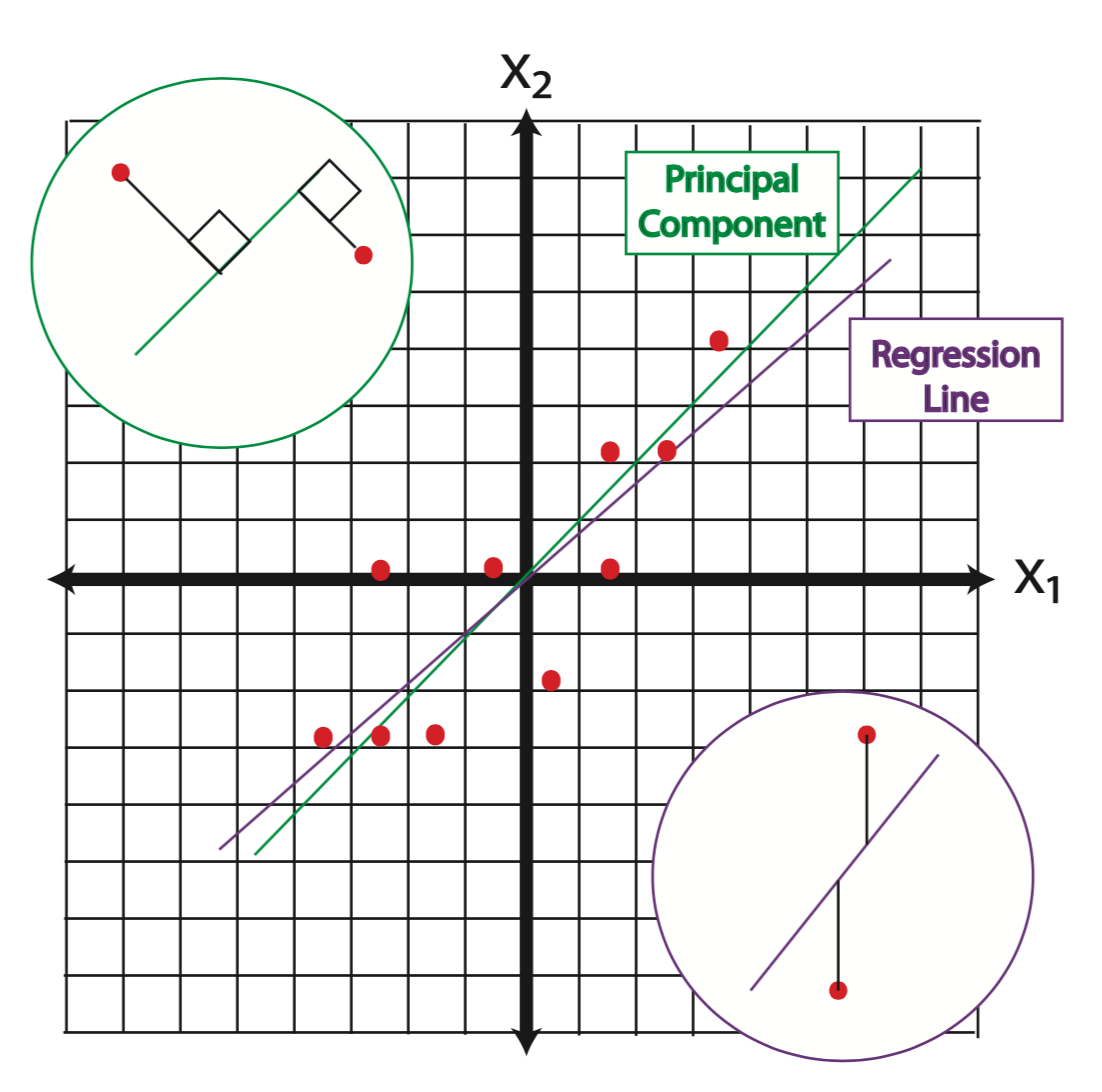

## Visualize multi-dimensional data

Iris dataset

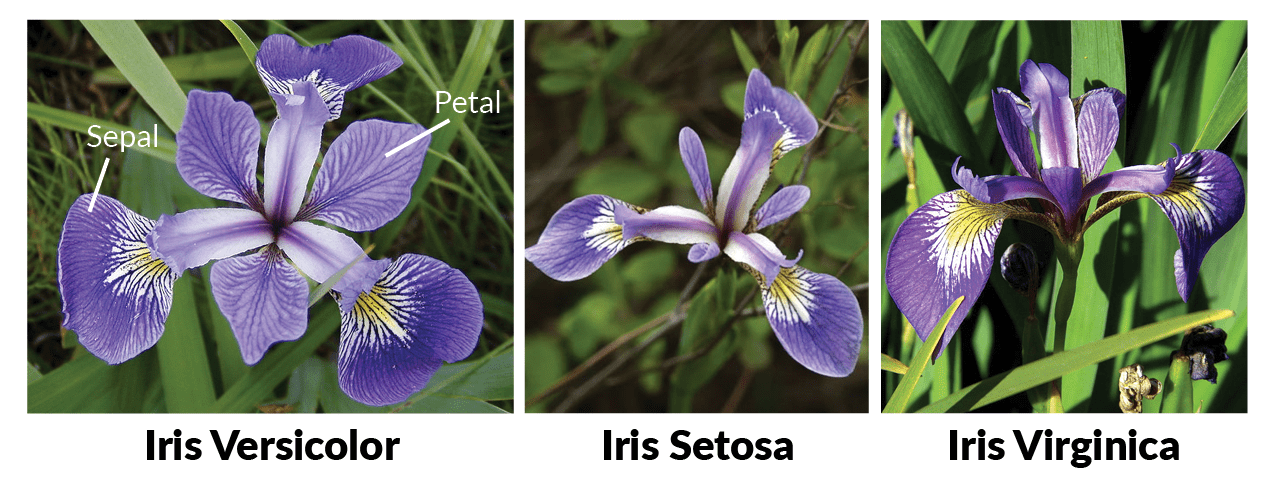

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

In [15]:
X.shape

(150, 4)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

In [17]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

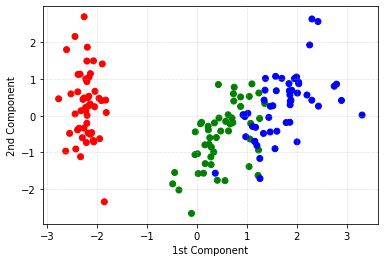

In [18]:
fig, ax = plt.subplots()

colors = np.array(['r','g','b'])

# scatter is similar to plot, additionally a color per point is provided
ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

Coefficients of principal components are related to the importance of a feature for that component.

In [19]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## Breast cancer dataset

In [20]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

X.shape

(569, 30)

In [21]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Let's plot the first 2 dimensions of such data. Classes are not nicely separated.

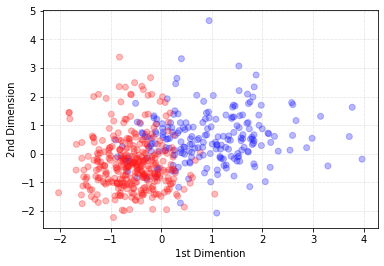

In [22]:
fig, ax = plt.subplots()

colors = np.array([(0.1,0.1,1.0,0.3),(1.0,0.1,0.1,0.3)])

# scatter is ismilar to plot, additionally a color per point is provided
ax.scatter(X[:,0],X[:,1], c=colors[y])

ax.set_xlabel("1st Dimention")
ax.set_ylabel("2nd Dimension")
ax.grid(linestyle=':', linewidth=.5)

In [23]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

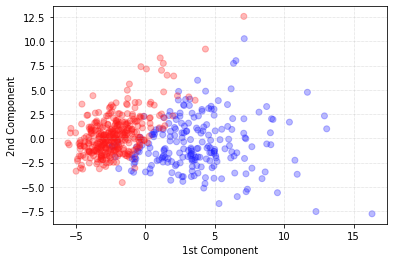

In [24]:
fig, ax = plt.subplots()

colors = np.array([(0.1,0.1,1.0,0.3),(1.0,0.1,0.1,0.3)])

# scatter is ismilar to plot, additionally a color per point is provided
ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

## Wine quality datasets

In [25]:
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
y = wine.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

X.shape

(178, 13)

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [28]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

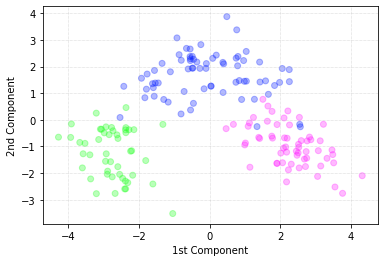

In [29]:
fig, ax = plt.subplots()

colors = np.array([(1.0,0.1,1.0,0.3),(0.0,0.1,1.0,0.3),(0.1,1.0,0.1,0.3)])

# scatter is ismilar to plot, additionally a color per point is provided
ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

## Image Compression

In [30]:
image = datasets.load_sample_image("flower.jpg")

In [31]:
image.shape

(427, 640, 3)

In [32]:
image

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [33]:
# make it a matrix of floats for better visualization
image = image/255

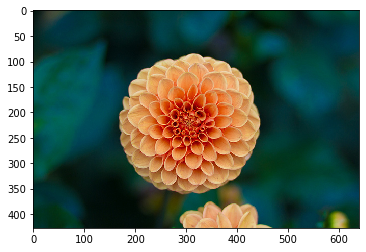

In [34]:
fig, ax = plt.subplots()

ax.imshow(image)

In [35]:
# reshape into a 2D matrix
#                             # rows       , auto
image_flat = image.reshape( (image.shape[0],-1))
print (image_flat.shape)

(427, 1920)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


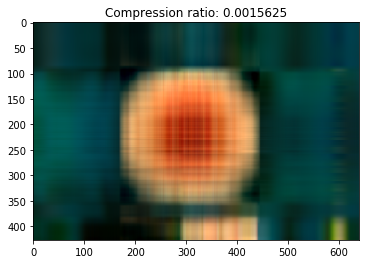

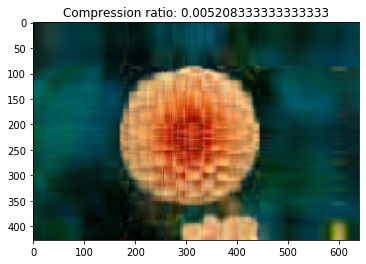

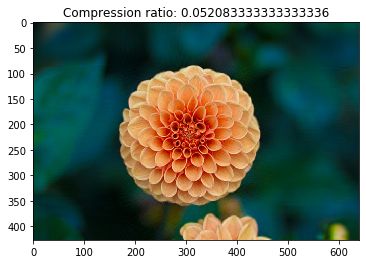

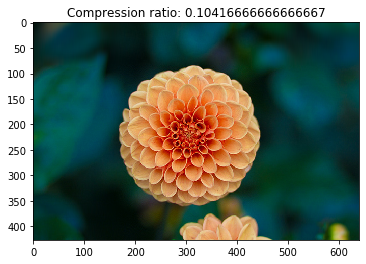

In [36]:
for n_c in [3,10,100,200]:
    pca = PCA(n_components=n_c)
    
    X_reduced = pca.fit_transform(image_flat)
    X_reconstructed = pca.inverse_transform(X_reduced)
    
    img_r = X_reconstructed.reshape(image.shape)
    
    fig, ax = plt.subplots()
    ax.imshow(img_r)
    compression = np.prod(X_reduced.shape) / np.prod(image.shape)
    ax.set_title("Compression ratio: " + str(compression))

## Optional

### Let's find the direction of maximum variance

Project all the data on a **unit vector** $u$. In mathematical notation, a vector is a column.


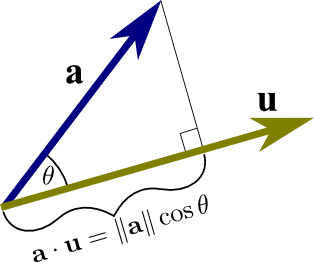

Measure the variance of the projected coordinates across points of the dataset.

From the cosine definition, we have that such projection is 
$$\|a\| \cos(\theta)  = \|a\| \frac{a^T\cdot u}{\|a\|\|u\|} = a^T\cdot u$$

Suppose we have a set of $m$ points points $x_1, \ldots, x_m$, we thus want to maximize the variance of their projection, i.e., the averge squared distance form the origin/mean:

$$
\begin{array}{rl}
  & \frac{1}{m} \sum (x_i^T  u)^2 \\
& = \frac{1}{m} \sum (x_i^T  u)(x_i^T  u) \\
& = \frac{1}{m} \sum (u^T x_i)(x_i^T  u) \\
% = \frac{1}{m} \sum u^T \left( x_i x_i^T \right) u 
& = u^T\left(\frac{1}{m}\sum x_i x_i^T\right) u \\
& = u^T C u
\end{array}
$$

where $C$ is called covariance matrix. 

$C$ has size $n\times n$, where $n$ is the number of dimensions of our data points.
$C[j,k]$ is the covariance between feature $j$ and feature $k$.
It is symmetrical. 
Covariance is similar to correlation, but, generally, data is not normalized (but we did normalize it beforehand!).

Note that, if $X$ is the matrix whose columns are the data points and the mean was subtracted, then $C=\frac{1}{m} X X^T$.


Recall that we chose $\|u\|=1$.

Therefore, our maximization problem is:
$$
{\sf maximize}\quad u^T C u\quad  \textrm{ subject to}\quad \|u\| = 1
$$
$$
{\sf maximize}\quad u^T C u\quad  \textrm{ subject to}\quad u^T u = 1
$$
by Lagrange multipliers, it becomes:
$$
{\sf maximize}\quad u^T C u  - \lambda (u^T u - 1)
$$

Find maximum by setting first derivative equal to 0.

$$
\frac{\partial}{\partial u} u^T C u  - \lambda (u^T u - 1) = 0
$$
$$
2 u^T C - 2\lambda u^T = 0
$$
$$
u^T C  = \lambda u^T
$$
or equivalently:
$$
C u = \lambda u
$$


This is the definition of principal eigenvector $u$ of the matrix $C$.

In general, an $m \times m$ covariance matrix has $m$ eigenvectors.

If we denote with $E$ the matrix whose columns are the eigenvectors $e_i$, we can write:
$$
C = E L E^T
$$
where $L$ is a diagonal matrix with $L[i,i]$ being the $i-th$ eigenvalue $\lambda_i$.

These eigenvectors are orthonormal: $e_i^T e_i=1$ and $e_i^T e_j=0$.

## Optional
### SVD: Singular Value Decomposition

It can be shown that a matrix $A$ can be written/decomposed into:
$$
A = U\Sigma V^T
$$

where $\Sigma$ is diagonal a $r\times r$ matrix, with $r$ being the rank of $A$.
$U$ and $V$ have orthonormal column vectors.


**Latent Semantic Indexing** is the application of this technique to text documents.

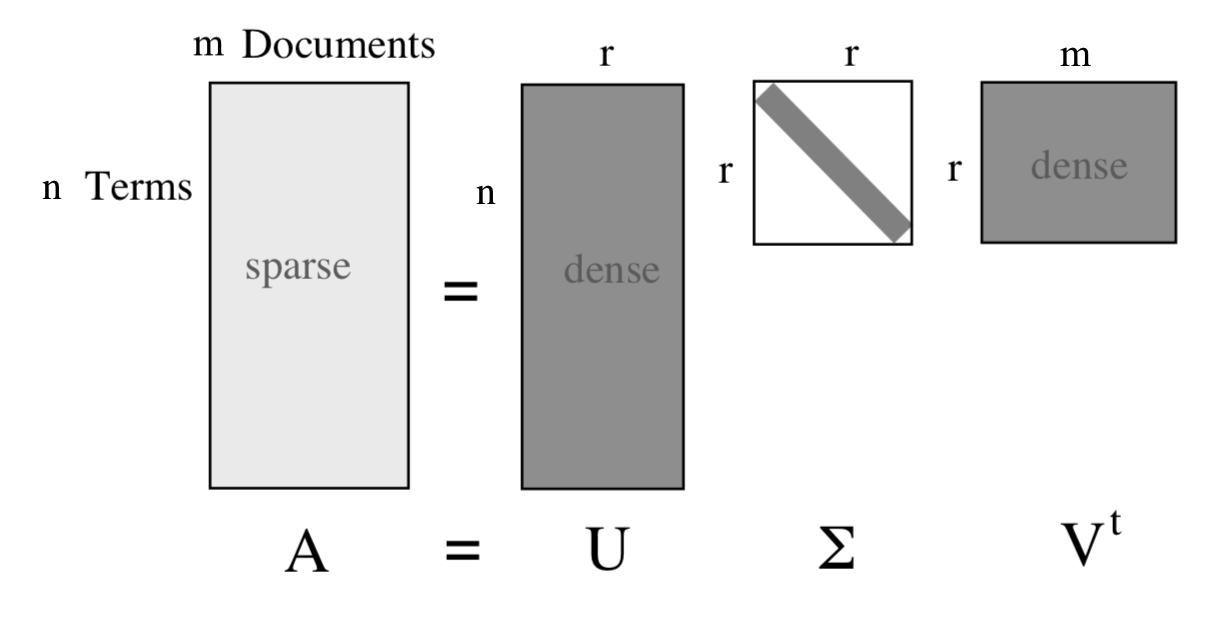

SVD is close to PCA.

If you compute the SVD of $A A^T$:

$$
\begin{array}{rcl}
AA^T & = & (U\Sigma V^T)(V\Sigma U^T) \\
& = & U\Sigma (V^T V) \Sigma U^T \\
& = & U\Sigma I \Sigma U^T \\
& = & U \Sigma^2 U^T \\
\end{array}
$$

Recall the eigen-decomposition of the covariance matrix $C=ELE^T$
and now we have the eigen-decomposition of the matrix $AA^T=U\Sigma^2U^T$.
Note that the covariance matrix of $A$ is different from $AA^T$ only in the scaling factor $\frac{1}{m}$ and in the mean subtraction. 


Interestingly, we can keep the principal components of the SVD decomposition and create an approximation of $A$.

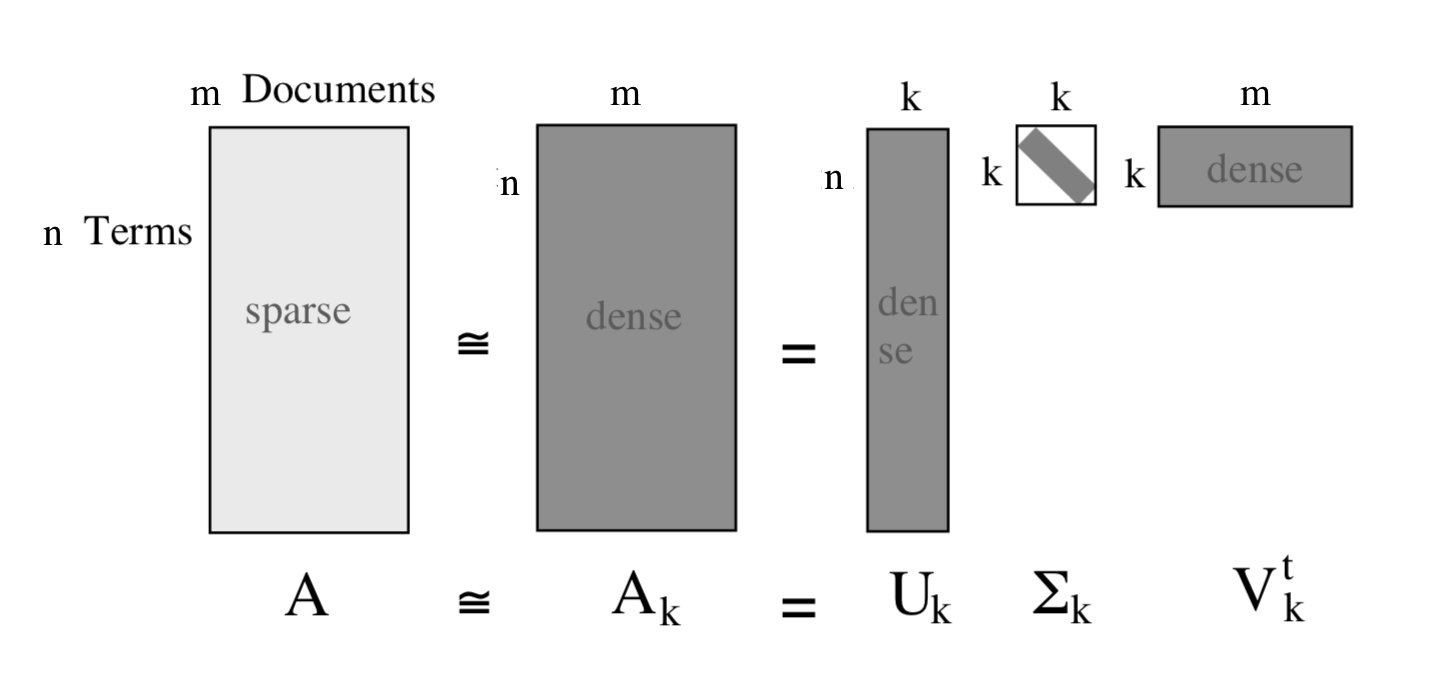

On varying $k$ we obtain a grouping of our data. In the case of text, we talk about topics.
LSI groups together terms co-occurring together in a subset of documents.

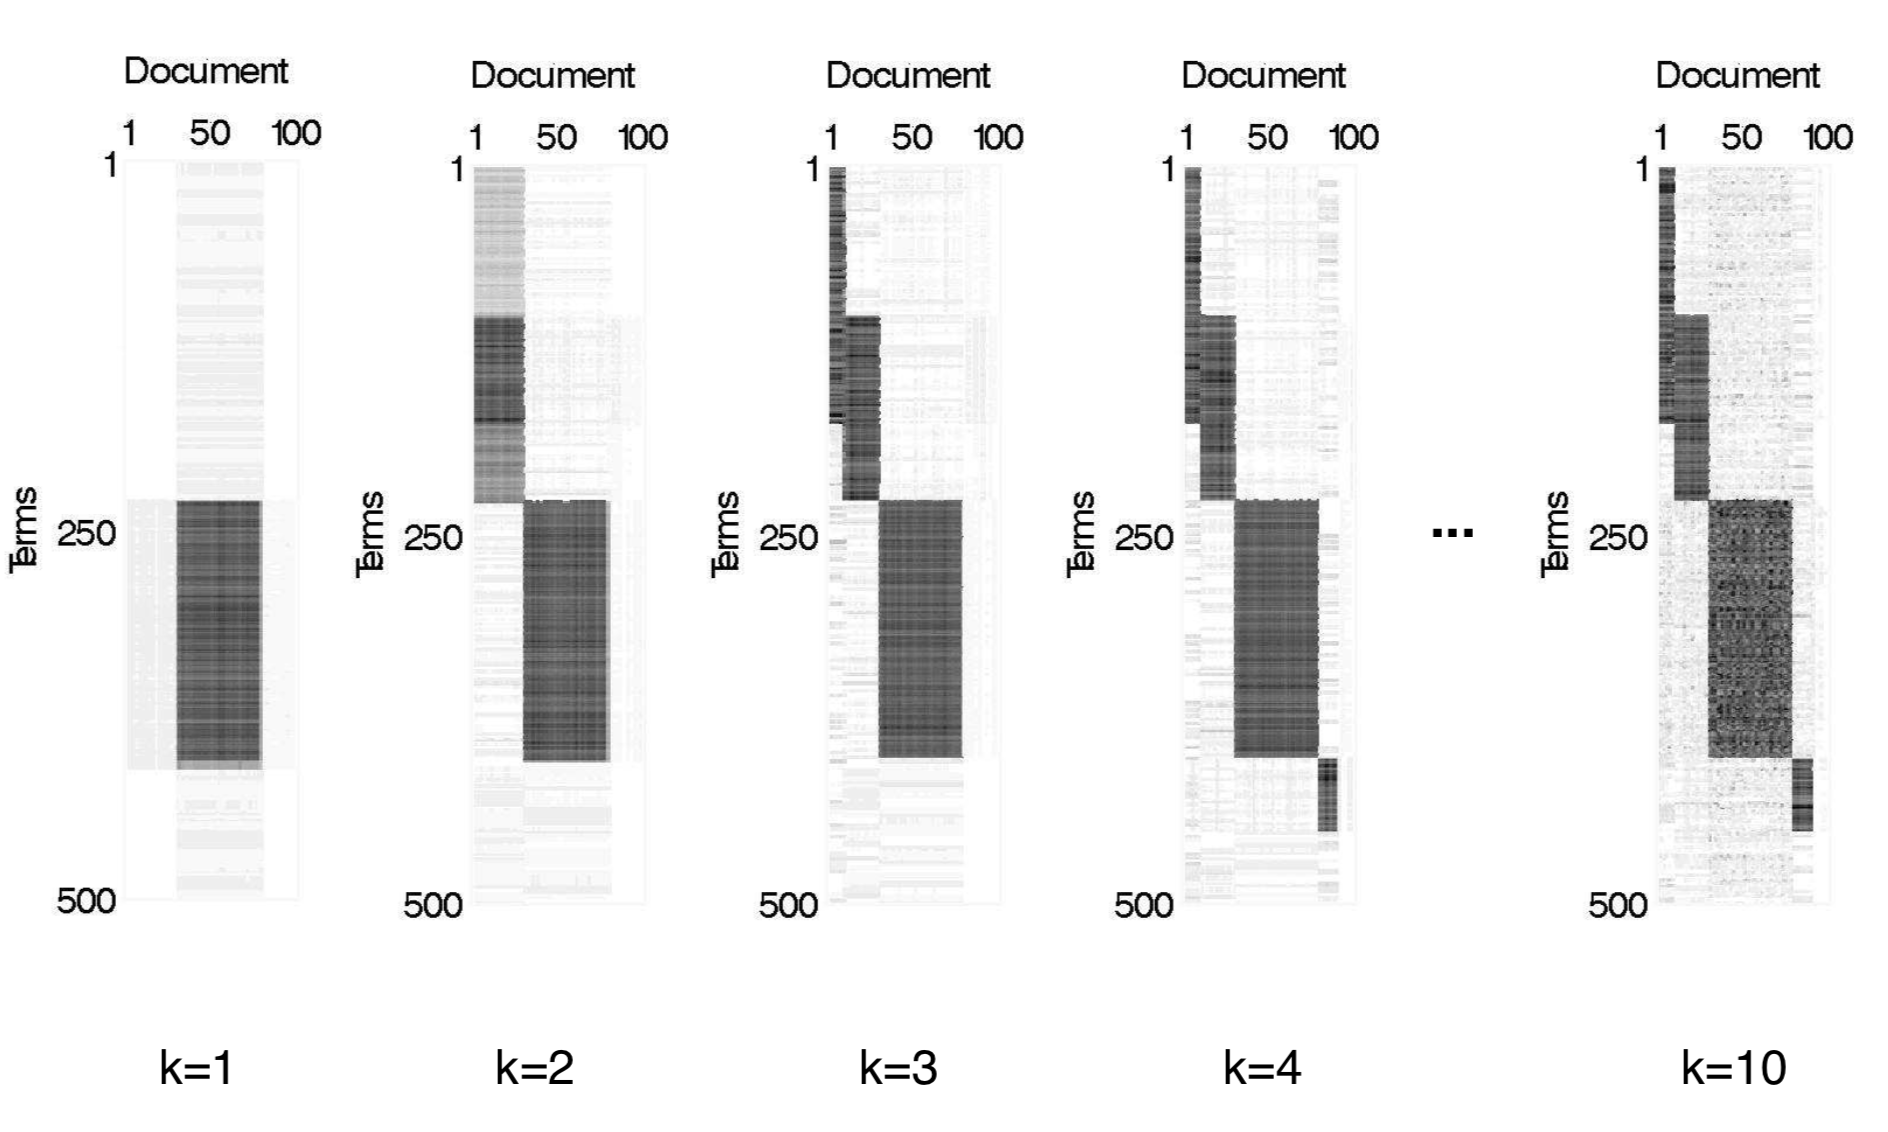

SVD is equivalent to fitting a regression line across the data. But it is not the same as PCA.

# References

- **Mining of Massive Datasets**. Leskovec, Rajaraman, Ullman. Cambridge University Press. 2014.
  - Download: http://www.mmds.org/
  - Chapter 11: Dimensionality Reduction (Not including 11.4)    
- **[optional]**: PCA. http://cs229.stanford.edu/notes/cs229-notes10.pdf 
- **[optional]**: Taming Text with the SVD. ftp://ftp.sas.com/techsup/download/EMiner/TamingTextwiththeSVD.pdf
- **[very optional]**: Linear algebra notes: http://www4.ncsu.edu/~slrace/LinearAlgebra.pdf